<a href="https://colab.research.google.com/github/nsoukouna3/Machine-Learning/blob/main/Titanic_Analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [39]:
titanic= pd.read_csv("tested.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [41]:
titanic.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [42]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [43]:
sex_count = titanic["Sex"].value_counts()
print(sex_count)

male      266
female    152
Name: Sex, dtype: int64


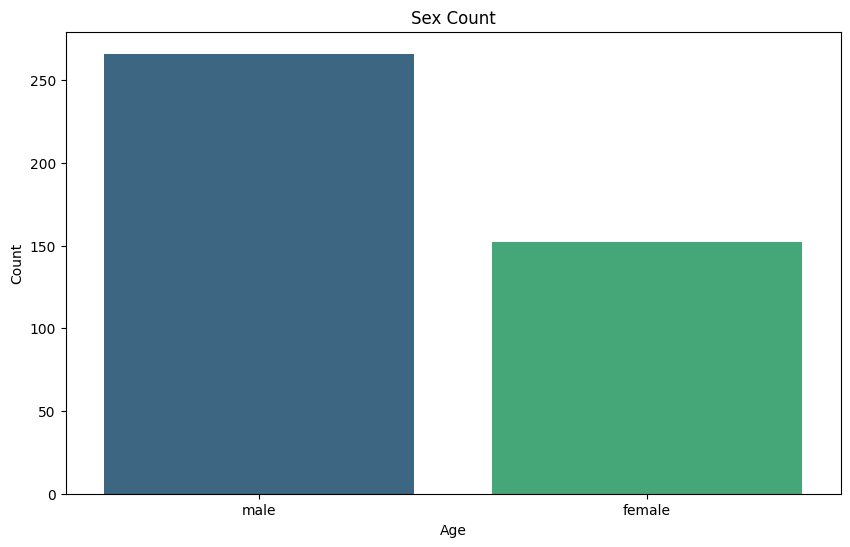

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x= sex_count.index, y= sex_count.values, palette="viridis")
plt.title("Sex Count")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [45]:
age_count = titanic["Age"].value_counts().head()
print(age_count)

21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
Name: Age, dtype: int64


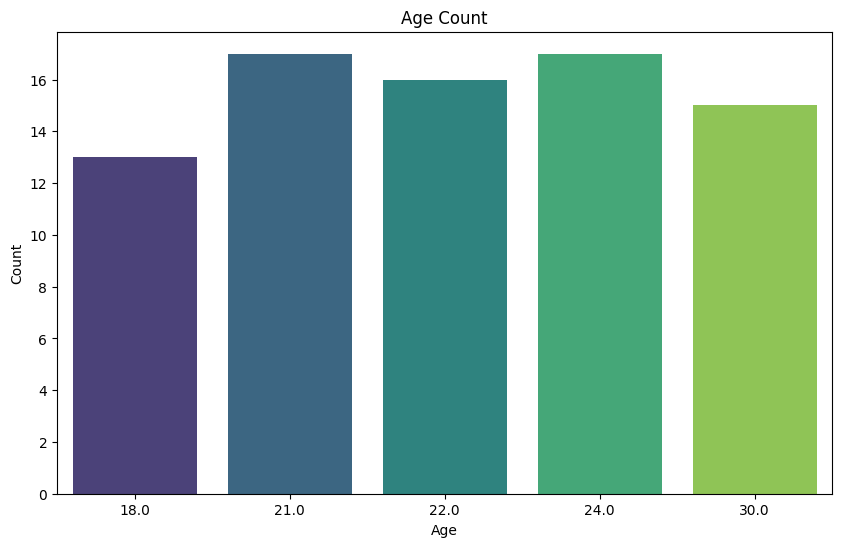

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(x=age_count.index, y= age_count.values, palette="viridis")
plt.title("Age Count")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [47]:
Pclass = titanic["Pclass"].value_counts()
print(Pclass)

3    218
1    107
2     93
Name: Pclass, dtype: int64


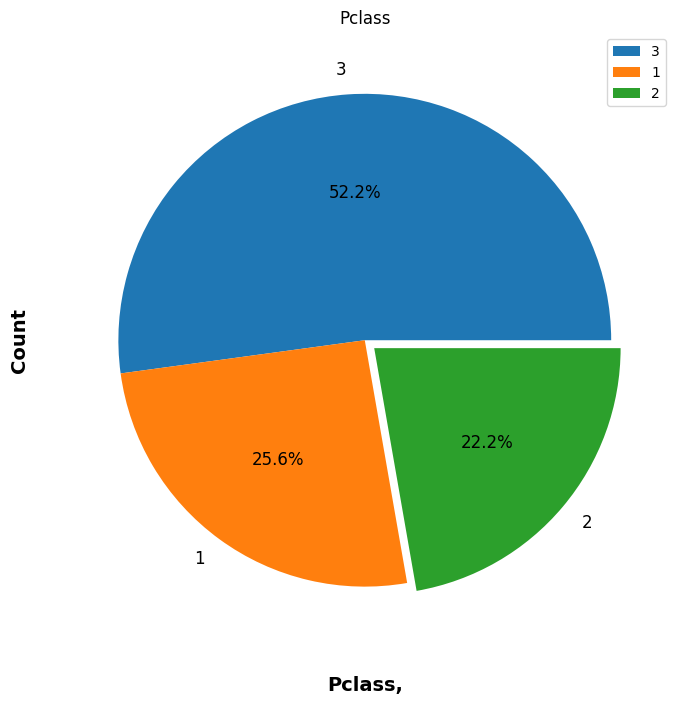

In [48]:
plt.figure(figsize=(20,8))
explode = (0,0,0.05)
Pclass.plot(kind="pie", fontsize=12, explode= explode, autopct="%.1f%%")
plt.title("Pclass")
plt.xlabel("Pclass,", weight="bold", color="#000000", fontsize=14,labelpad=20)
plt.ylabel("Count", weight="bold", color="#000000", fontsize=14, labelpad=20)
plt.legend(labels=Pclass.index, loc="best")
plt.show()


In [49]:
Sibling_Spouse_count = titanic["SibSp"].value_counts()
Sibling_Spouse_count

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

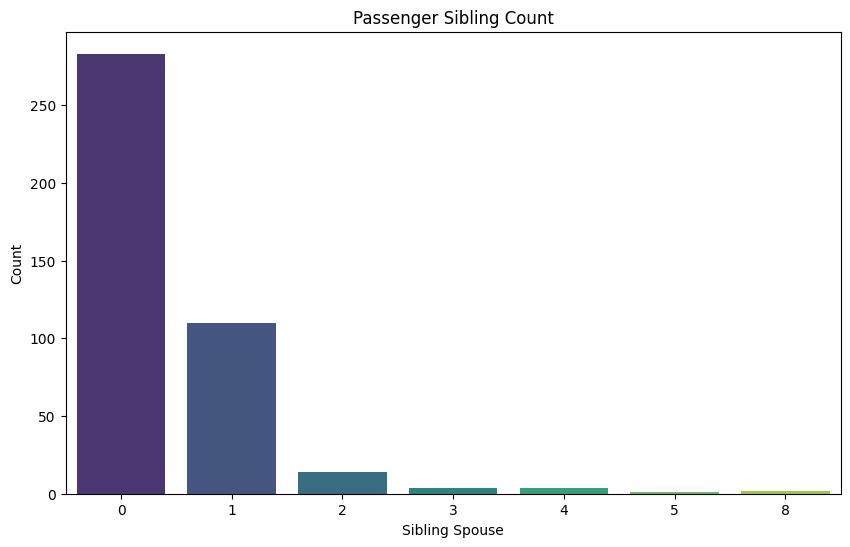

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(x=Sibling_Spouse_count.index, y=Sibling_Spouse_count.values, palette= "viridis" )
plt.title("Passenger Sibling Count")
plt.xlabel("Sibling Spouse")
plt.ylabel("Count")
plt.show()

In [51]:
Passage_Parent_children = titanic["Parch"].value_counts()
Passage_Parent_children

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

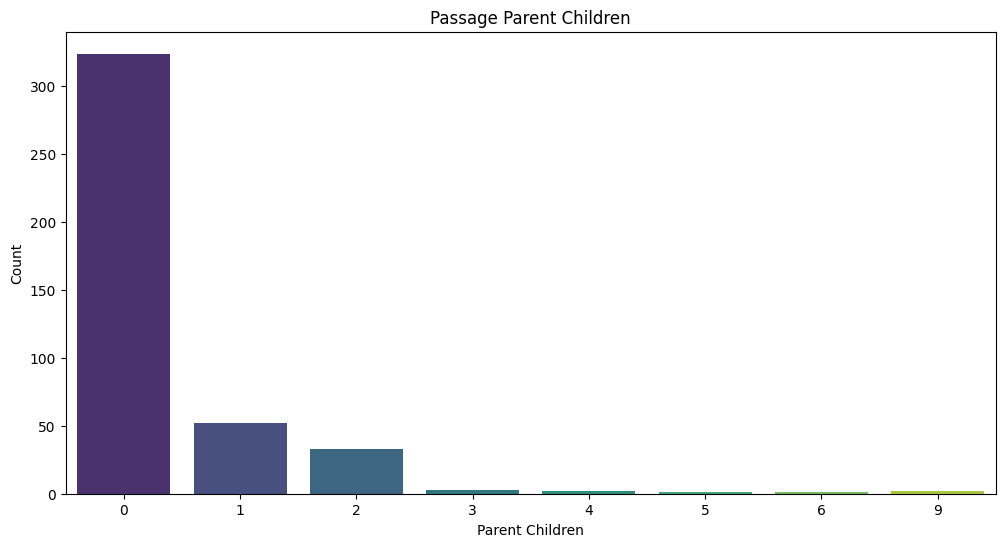

In [52]:
plt.figure(figsize=(12,6))
sns.barplot(x=Passage_Parent_children.index, y=Passage_Parent_children.values, palette="viridis" )
plt.title("Passage Parent Children")
plt.xlabel("Parent Children")
plt.ylabel("Count")
plt.show()

In [53]:
embarked = titanic["Embarked"].value_counts()
embarked

S    270
C    102
Q     46
Name: Embarked, dtype: int64

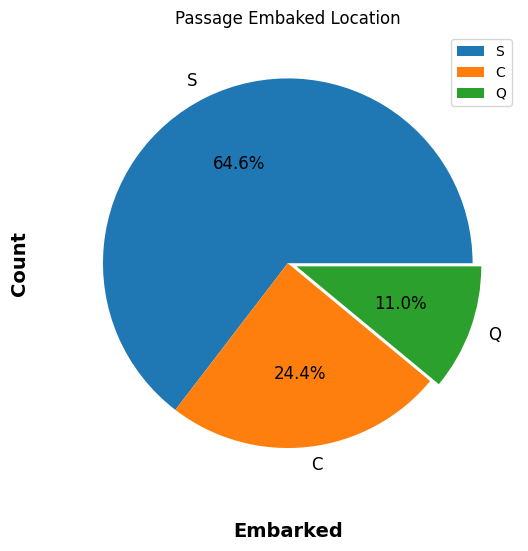

In [54]:
plt.figure(figsize=(20,6))
explode=(0,0,0.05)
embarked.plot(kind="pie", fontsize=12, explode=explode, autopct="%.1f%%")
plt.title("Passage Embaked Location")
plt.xlabel("Embarked", weight="bold", fontsize=14, color="#000000", labelpad=20)
plt.ylabel("Count", weight="bold", fontsize=14, color="#000000", labelpad=20)
plt.legend(labels=embarked.index, loc="best")
plt.show()

In [55]:
survived = titanic["Survived"].value_counts()
survived

0    266
1    152
Name: Survived, dtype: int64

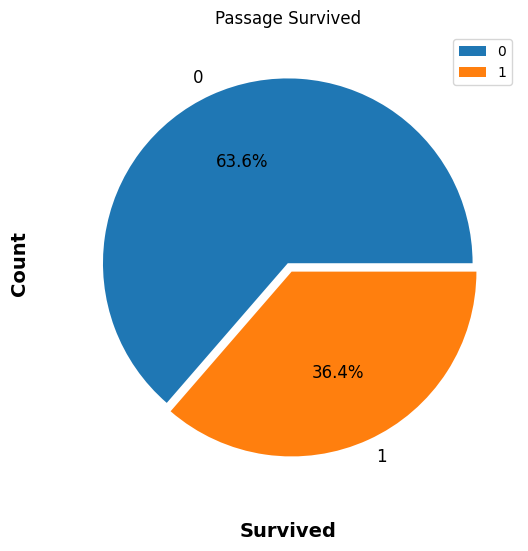

In [56]:
plt.figure(figsize=(20,6))
explode=(0,0.05)
survived.plot(kind="pie", fontsize=12, explode=explode, autopct="%.1f%%")
plt.title("Passage Survived")
plt.xlabel("Survived", weight="bold", fontsize=14, color="#000000",labelpad=20)
plt.ylabel("Count", weight="bold", fontsize=14, color="#000000", labelpad=20)
plt.legend(survived.index,loc="best")
plt.show()

**Visualize age are survived or not**

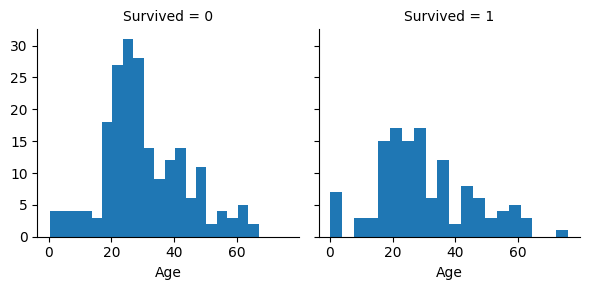

In [57]:
age= sns.FacetGrid(titanic, col="Survived")
age.map(plt.hist, "Age", bins=20)

**Visualize Gender Survived or Not**

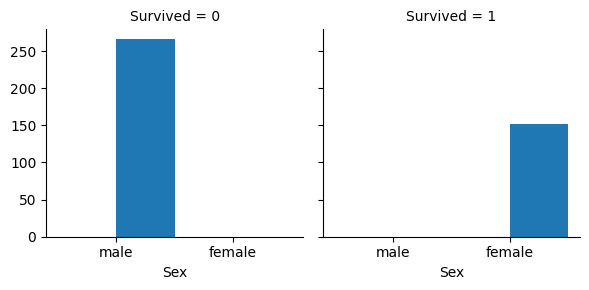

In [58]:
gender = sns.FacetGrid(titanic, col="Survived")
gender.map(plt.hist,"Sex", bins=2)

**Visualize Sibling Spouse Survived or not**

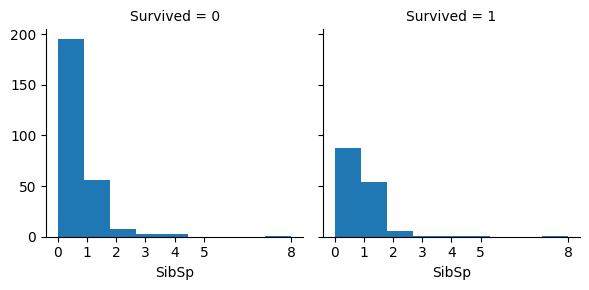

In [59]:
sibling_spouse = sns.FacetGrid(titanic, col="Survived")
plt.xticks(Sibling_Spouse_count.index)
sibling_spouse.map(plt.hist, "SibSp", bins=9)

**Visualize Passenger Class Survived or Not**

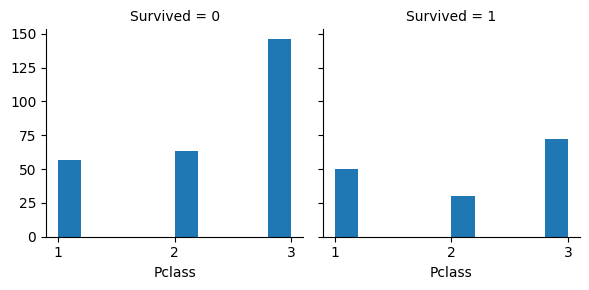

In [60]:
pclass= sns.FacetGrid(titanic, col="Survived")
plt.xticks([1,2,3])
pclass.map(plt.hist,"Pclass" )

**Visualize Parent Childeren Survived or Not**

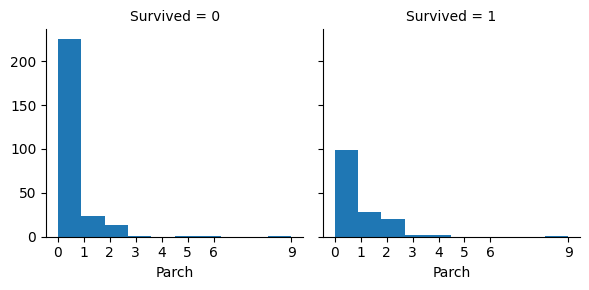

In [61]:
ParCh = sns.FacetGrid(titanic, col="Survived")
plt.xticks(Passage_Parent_children.index)
ParCh.map(plt.hist, "Parch")

**Data Preprocessing**


**Dropping passager Name, ID, Cabin , Ticket**


We are dropping Cabin because it has a lot missing value and it's critical to our analysis

In [62]:
titanic = titanic.drop(columns=["PassengerId", "Name", "Cabin","Ticket"], axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


**Changing category variable to binary 0 and 1 in the Sex Column by replace male by 1 and female by 0 **

In [63]:
titanic["Sex"]= titanic["Sex"].astype("category")
titanic["Sex"]= titanic["Sex"].cat.codes
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,Q
1,1,3,0,47.0,1,0,7.0000,S
2,0,2,1,62.0,0,0,9.6875,Q
3,0,3,1,27.0,0,0,8.6625,S
4,1,3,0,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,1,NaN,0,0,8.0500,S
414,1,1,0,39.0,0,0,108.9000,C
415,0,3,1,38.5,0,0,7.2500,S
416,0,3,1,NaN,0,0,8.0500,S


**In the age column replace nan value by median value of the column**

In [64]:
titanic["Age"].fillna(titanic["Age"].median(), inplace=True)
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

**In the Fare column replace nan value by the median value**

In [65]:
titanic["Fare"].fillna(titanic["Fare"].median(),inplace=True)
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**In the Embarked column replace nan value byt the most frequent value in that column**

In [66]:
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Changing categorical value in the Embarked column by C:0,  S:1 ,Q:2**

In [67]:
titanic["Embarked"]= titanic["Embarked"].astype("category")
titanic["Embarked"]= titanic["Embarked"].cat.codes
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,0,3,1,27.0,0,0,8.0500,2
414,1,1,0,39.0,0,0,108.9000,0
415,0,3,1,38.5,0,0,7.2500,2
416,0,3,1,27.0,0,0,8.0500,2


In [68]:
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.108615,-1.000000,0.008035,0.099943,0.159120,0.192036,-0.076281
Pclass,-0.108615,1.000000,0.108615,-0.467853,0.001087,0.018721,-0.577313,0.227983
Sex,-1.000000,0.108615,1.000000,-0.008035,-0.099943,-0.159120,-0.192036,0.076281
Age,0.008035,-0.467853,-0.008035,1.000000,-0.071197,-0.043731,0.342357,-0.148051
SibSp,0.099943,0.001087,-0.099943,-0.071197,1.000000,0.306895,0.171912,0.052708
Parch,0.159120,0.018721,-0.159120,-0.043731,0.306895,1.000000,0.230325,0.054577
Fare,0.192036,-0.577313,-0.192036,0.342357,0.171912,0.230325,1.000000,-0.257624
Embarked,-0.076281,0.227983,0.076281,-0.148051,0.052708,0.054577,-0.257624,1.000000


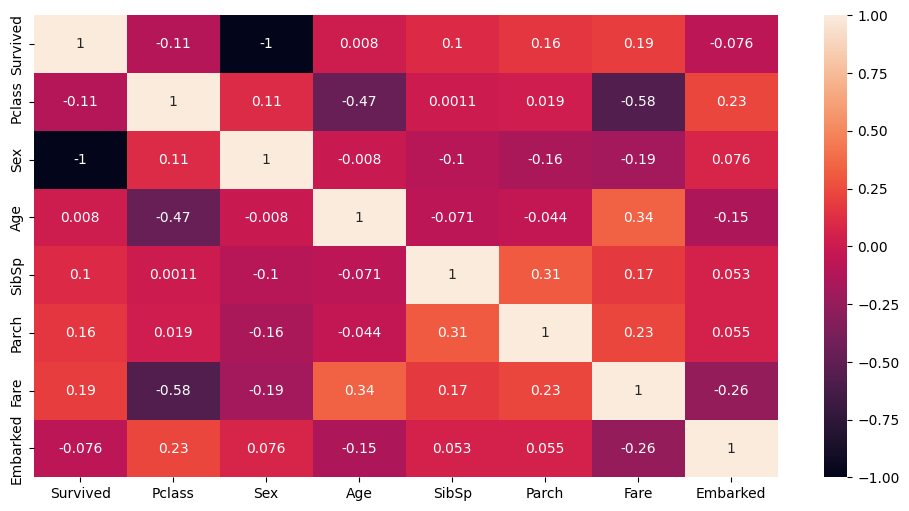

In [69]:
plt.figure(figsize=(12,6))
sns.heatmap(titanic.corr(), annot=True)
plt.show()

**Data Preprocessing**

Defined Features and Target

In [70]:
x= titanic.drop(columns="Survived")
y= titanic["Survived"]

**Data Scaling**

In [71]:
scaler = MinMaxScaler()
x= scaler.fit_transform(x)

**Reshaping y value**

In [72]:
y= y.values.reshape(-1,1)

**Split the dataset into training and testing sets**

In [73]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, shuffle=True,random_state=42)

In [74]:
regressor = LogisticRegression(penalty="l2", max_iter=1000,solver="lbfgs")
regressor.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [78]:
regressor.score(x_train, y_train)

1.0